In [1]:
import numpy as np
import pandas as pd
import json
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.corpus import stopwords

# Data Understanding

In [2]:

df_train = pd.read_csv('../data/train.csv')

In [3]:
df_train.head(5)

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [4]:
df_train.describe()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
count,19661,19661,19661,19661,19661
unique,14316,14271,45,130,130
top,170113f9-399c-489e-ab53-2faf5c64c5bc,Science and Engineering Indicators 2014,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
freq,22,22,6144,3673,3673


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


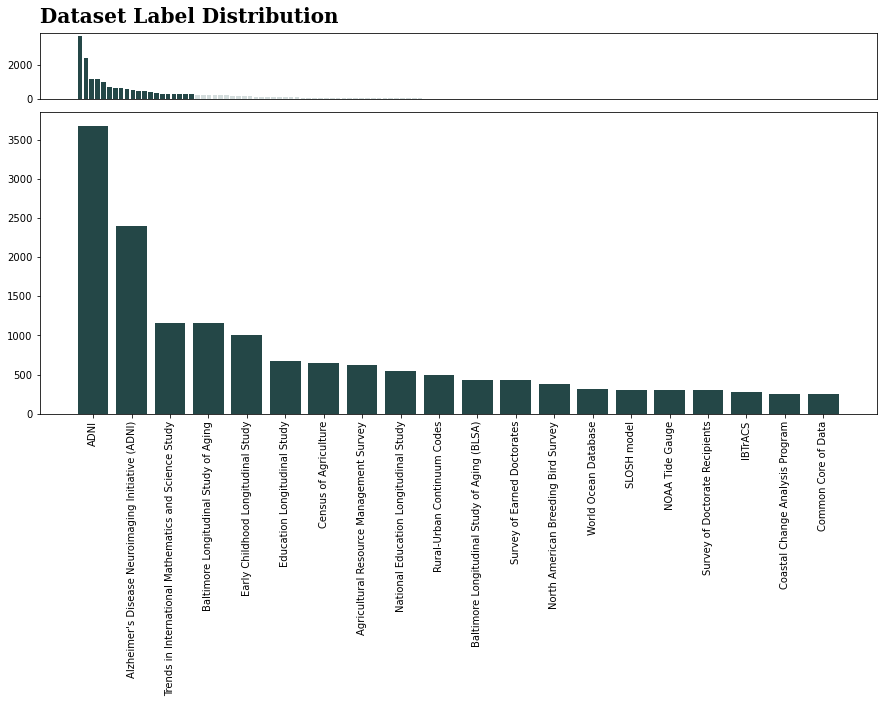

In [6]:
dataset_label = df_train['dataset_label'].value_counts()[:20]
fig = plt.figure(figsize=(15, 7))

gs = fig.add_gridspec(5, 6)

ax1 = fig.add_subplot(gs[0,:])
dataset_label = df_train['dataset_label'].value_counts()
ax1.bar(dataset_label.index, dataset_label,
       color=['#244747']*20 + ['#d4dddd']*(len(dataset_label) - 20)
       )
ax1.set_xticks([])


ax2 = fig.add_subplot(gs[1:,:])
dataset_label = df_train['dataset_label'].value_counts()[:20]
ax2.bar(dataset_label.index, dataset_label,
        color='#244747'
       )
ax2.set_xticks(range(len(dataset_label.index)))
ax2.set_xticklabels(dataset_label.index, rotation = 90)


fig.text(0.125,0.9,'Dataset Label Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

In [7]:
def text_prep(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()


Clean 'pub_title' column using text_prep funcation.

In [8]:
import re
pub_title_clean = df_train['pub_title'].apply(lambda x: text_prep(x))

In [9]:
pub_title_clean

0        the impact of dual enrollment on college degre...
1        educational attainment of high school dropouts...
2        differences in outcomes for female and male st...
3        stepping stone and option value in a model of ...
4        parental effort school resources and student a...
                               ...                        
19656    rsna international trends a global perspective...
19657    mccs a novel recognition pattern based method ...
19658    quantitative structure activity relationship m...
19659    a ligand based computational drug repurposing ...
19660    a ligand based computational drug repurposing ...
Name: pub_title, Length: 19661, dtype: object

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


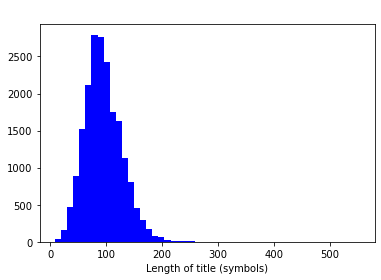

In [10]:
pub_title_len = pub_title_clean.str.len()

plt.title('Title length', size = 15, color = 'white')
sns.distplot(pub_title_len, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (symbols)')
plt.show()

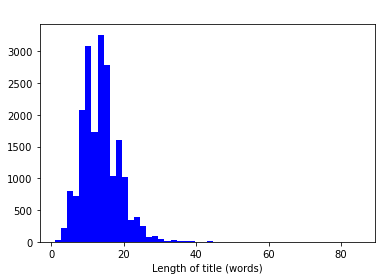

In [11]:
title_words = pub_title_clean.str.split().map(lambda x: len(x))

plt.title('Title words', size = 15, color = 'white')
sns.distplot(title_words, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (words)')
plt.show()

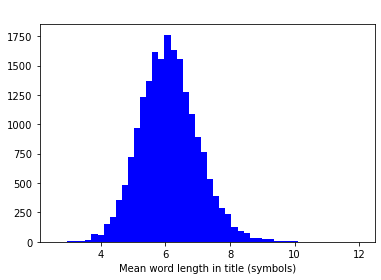

In [12]:
pub_title_len = pub_title_clean.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.title('Title words length', size = 15, color = 'white')
sns.distplot(pub_title_len, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Mean word length in title (symbols)')
plt.show()

In [13]:
from collections import Counter

words = pub_title_clean.str.split().values.tolist()
title_corpus = [word for i in words for word in i]

title_counter = Counter(title_corpus)
title_most = title_counter.most_common()

stop = set(stopwords.words('english'))

title_top_words, title_top_words_count = [], []
for word, count in title_most[:100]:
    if word not in stop:
        title_top_words.append(word)
        title_top_words_count.append(count)

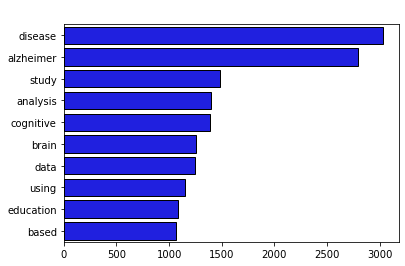

In [14]:
plt.title('TOP-10 title words', color = 'white', size = 15)
sns.barplot(y = title_top_words[:10], x = title_top_words_count[:10], 
            edgecolor = 'black', color = 'blue')
plt.show()

In [18]:

def show_wordcloud(data, stop, mask = None, title = None, color = 'black'):
    """
    Function for creating wordclouds (with or without mask)
    """
    from wordcloud import WordCloud, ImageColorGenerator
    wordcloud = WordCloud(background_color = color,
                         stopwords = stop,
                         mask = mask,
                         max_words = 100,
                         scale = 3,
                         width = 4000, 
                         height = 2000,
                         collocations = False,
                         random_state = 1)
    
    wordcloud = wordcloud.generate(data)
    
    plt.figure(1, figsize = (16, 8), dpi = 300)
    plt.title(title, size = 15)
    plt.axis('off')
    if mask is None:
        plt.imshow(wordcloud, interpolation = "bilinear")
        plt.show()
    else:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func = image_colors), 
                   interpolation = "bilinear")
        plt.show()

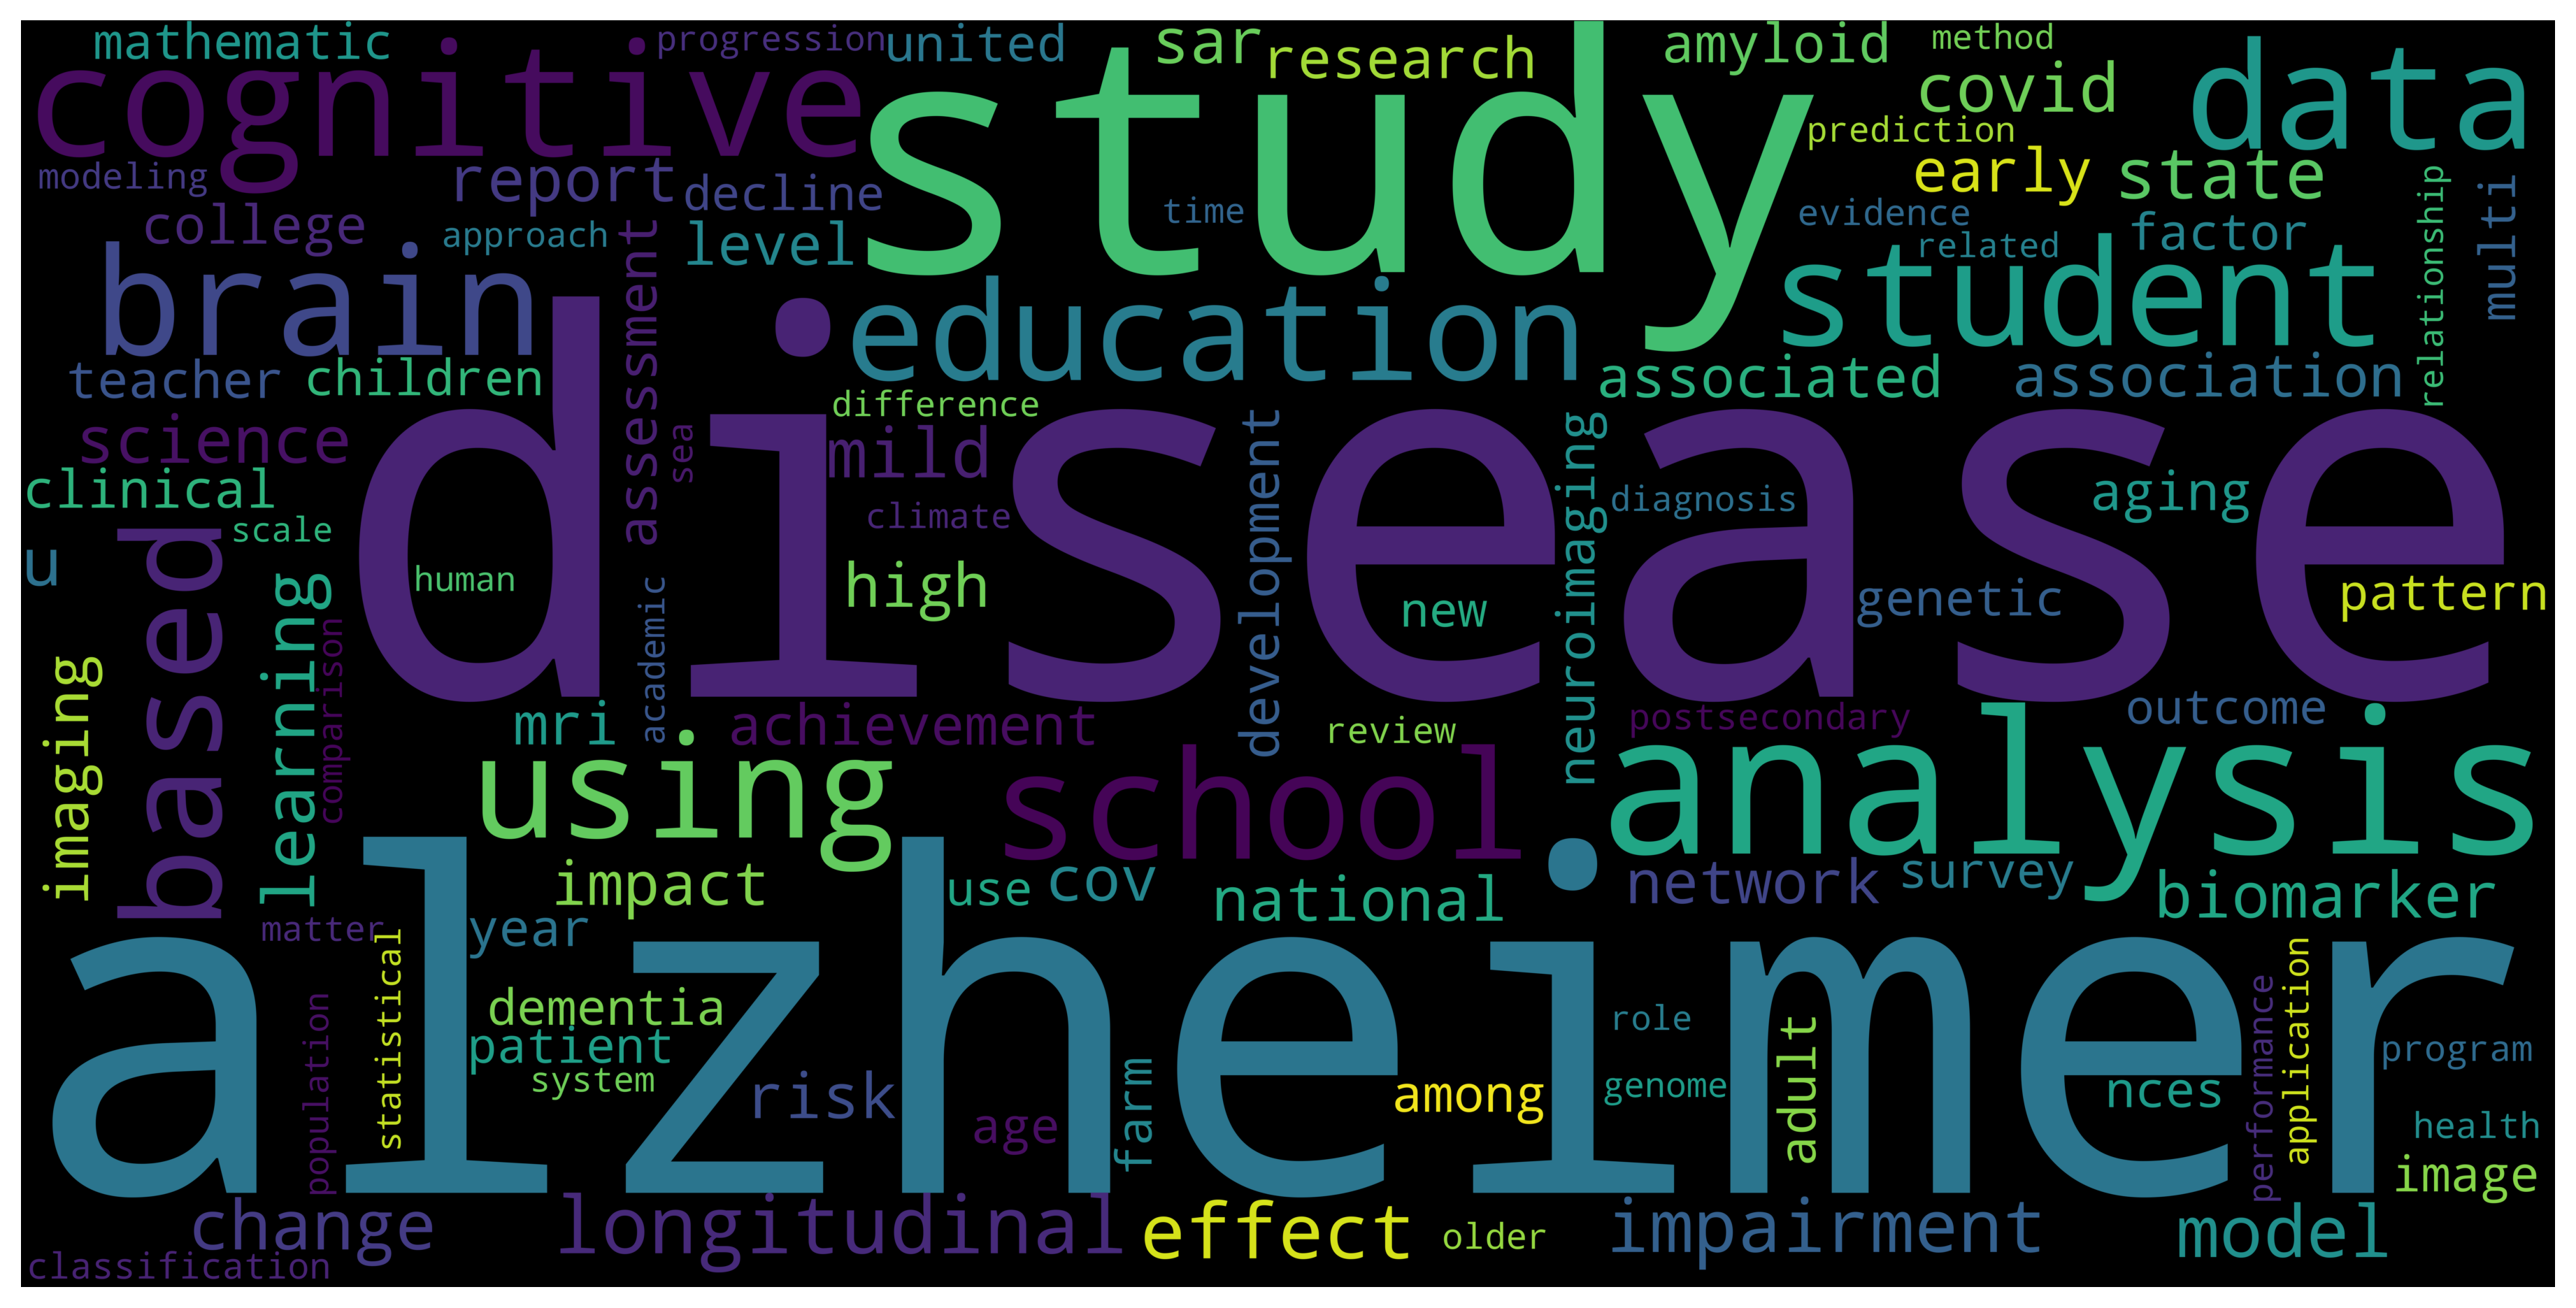

In [19]:
title_word_string = ' '.join(title_corpus)
show_wordcloud(title_word_string, stop)

Find common words in the titles

In [20]:
title_words = pub_title_clean.str.split(expand=True).stack().value_counts()
title_words.sort_values(ascending=False,inplace=True)
title_words = pd.DataFrame(title_words).reset_index()
title_words.columns=['word','count']
title_words

,word,count
0,of,12759
1,and,11748
2,in,9333
3,the,9281
4,a,4135
...,...,...
13927,smallholders,1
13928,elusive,1
13929,rsna,1
13930,schoolwide,1


Add the word lengths

In [21]:
title_words['word_length']=title_words.word.str.len()
title_words

,word,count,word_length
0,of,12759,2
1,and,11748,3
2,in,9333,2
3,the,9281,3
4,a,4135,1
...,...,...,...
13927,smallholders,1,12
13928,elusive,1,7
13929,rsna,1,4
13930,schoolwide,1,10


In [23]:
train_texts = df_train['Id'].progress_apply(lambda x: text_extractor(x))

AttributeError: 'Series' object has no attribute 'progress_apply'

In [24]:
df_train

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
...,...,...,...,...,...
19656,b3498176-8832-4033-aea6-b5ea85ea04c4,RSNA International Trends: A Global Perspectiv...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID Open Radiology Database,rsna international covid open radiology database
19657,f77eb51f-c3ac-420b-9586-cb187849c321,MCCS: a novel recognition pattern-based method...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19658,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,Quantitative Structure–Activity Relationship M...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...


In [25]:
#feature engineering 
df_train['pub_title_count'] = df_train['pub_title'].apply(
    lambda x: len(x.strip().split()))  # word count in abstract
df_train.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,pub_title_count
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,13
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,13
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,11
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,11
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,7


In [26]:
#remove possible duplicates
df_train.drop_duplicates(['pub_title'], inplace=True)
df_train['pub_title'].describe(include='all')

count                                                 14271
unique                                                14271
top       How Important Is U.S. Location for Research in...
freq                                                      1
Name: pub_title, dtype: object

In [27]:
#remove possible duplicates
df_train.drop_duplicates(['pub_title'], inplace=True)
df_train['pub_title'].describe(include='all')

count                                                 14271
unique                                                14271
top       How Important Is U.S. Location for Research in...
freq                                                      1
Name: pub_title, dtype: object

In [28]:
#drop NA's 
df_train.dropna(subset=['pub_title'],inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 19659
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               14271 non-null  object
 1   pub_title        14271 non-null  object
 2   dataset_title    14271 non-null  object
 3   dataset_label    14271 non-null  object
 4   cleaned_label    14271 non-null  object
 5   pub_title_count  14271 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 780.4+ KB


In [29]:
df_train.isnull().sum()

Id                 0
pub_title          0
dataset_title      0
dataset_label      0
cleaned_label      0
pub_title_count    0
dtype: int64

k-Meams

In [30]:
#vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text,maxx_features):
    vectorizer = TfidfVectorizer(max_features = maxx_features)
    X = vectorizer.fit_transform(text)
    return X 

In [31]:
#ensure search is converted to string, no punctuation and lower case 
df_train['pub_title']=df_train['pub_title'].astype(str)
df_train["pub_title"] = df_train['pub_title'].str.replace('[^\w\s]','')
df_train["pub_title"] = df_train['pub_title'].str.lower()
df_train.head(10)

,Id,pub_title,dataset_title,dataset_label,cleaned_label,pub_title_count
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,the impact of dual enrollment on college degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,13
1,2f26f645-3dec-485d-b68d-f013c9e05e60,educational attainment of high school dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,13
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,differences in outcomes for female and male st...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,11
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,stepping stone and option value in a model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,11
4,c754dec7-c5a3-4337-9892-c02158475064,parental effort school resources and student a...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,7
5,81b5f874-9b42-4d4f-8c50-b4bab24f8aed,the gender gap reloaded are school characteris...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,12
6,f35fdfa6-a3f9-4ef3-a858-c8e2efcd2349,the high school environment and the gender gap...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,12
7,1b21f60a-4022-4b19-95ce-6fd7157d4aa9,examining latinos involvement in the workforce...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,14
8,e5a4c6af-0854-4f7e-b088-06f03c18a01a,locus of control and peer relationships among ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,14
9,4e18b1c7-e195-46e2-af0f-78757259f0c6,the role of research in catholic education,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,7


In [32]:
#tfid vectorize the column 
text = df_train['pub_title'].values
X = vectorize(text,2**12)
X.shape

(14271, 4096)

In [33]:
#PCA from sklearn.cluster import KMeans reduce dimensions and k-means clustering 
from sklearn.decomposition import PCA 

pca = PCA(n_components=.95,random_state=42)
X_reduced = pca.fit_transform(X.toarray())
X_reduced.shape

(14271, 2903)

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist 

distortions = []
K = range(2,20)

for k in K: 
    k_means = KMeans(n_clusters=k,random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced,k_means.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

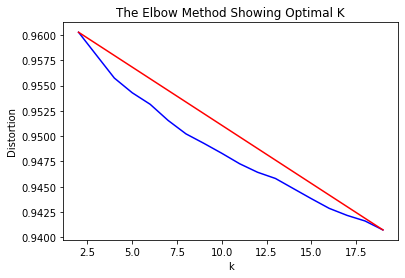

In [35]:
import matplotlib.pyplot as plt 
X_line = [K[0],K[-1]]
Y_line = [distortions[0],distortions[-1]]

#plot the elbow 
plt.plot(K,distortions,'b-')
plt.plot(X_line,Y_line,'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing Optimal K')
plt.show()

In [39]:
k = 8
kmeans = KMeans(n_clusters = k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df_train['y'] = y_pred

In [40]:
from sklearn.manifold import TSNE 

tsne = TSNE(verbose=1,perplexity=100,random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 14271 samples in 6.060s...
[t-SNE] Computed neighbors for 14271 samples in 1393.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14271
[t-SNE] Computed conditional probabilities for sample 2000 / 14271
[t-SNE] Computed conditional probabilities for sample 3000 / 14271
[t-SNE] Computed conditional probabilities for sample 4000 / 14271
[t-SNE] Computed conditional probabilities for sample 5000 / 14271
[t-SNE] Computed conditional probabilities for sample 6000 / 14271
[t-SNE] Computed conditional probabilities for sample 7000 / 14271
[t-SNE] Computed conditional probabilities for sample 8000 / 14271
[t-SNE] Computed conditional probabilities for sample 9000 / 14271
[t-SNE] Computed conditional probabilities for sample 10000 / 14271
[t-SNE] Computed conditional probabilities for sample 11000 / 14271
[t-SNE] Computed conditional probabilities for sample 12000 / 14271
[t-SNE] Computed conditional probabilities for

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


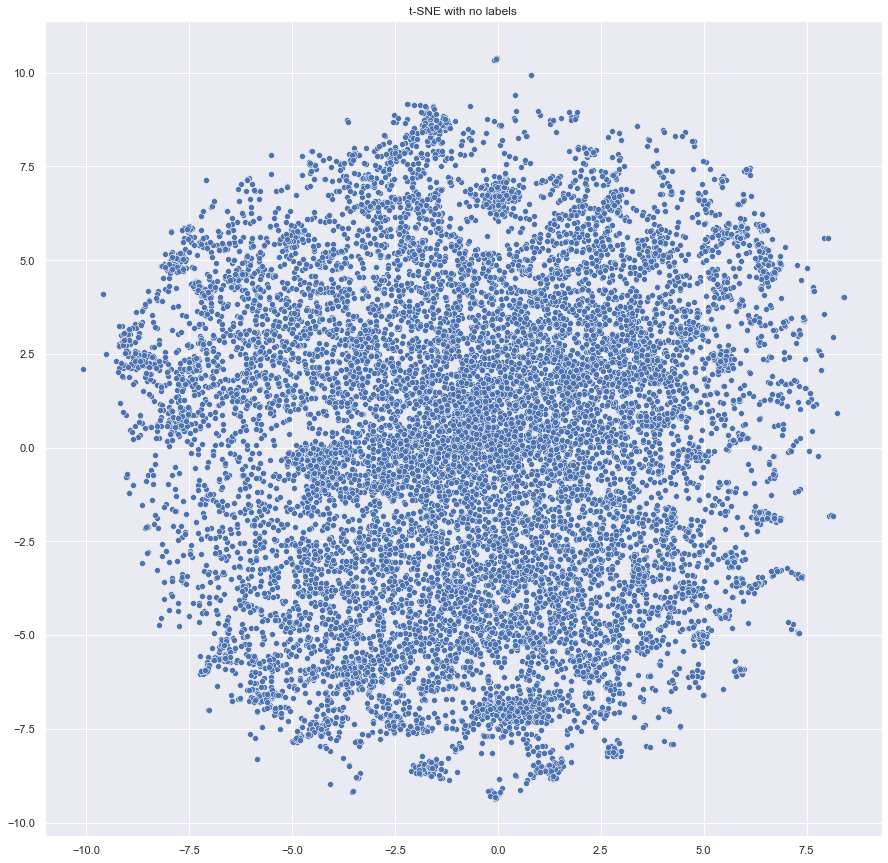

In [41]:
from matplotlib import pyplot as plt 
import seaborn as sns 

#sns settings
sns.set(rc={'figure.figsize':(15,15)})

#colors
palette = sns.color_palette("bright",1)

#plot
sns.scatterplot(X_embedded[:,0],X_embedded[:,1],palette=palette)
plt.title('t-SNE with no labels')
plt.savefig('t-sne_kmeans_academic')
plt.show()

Detect Topics of each cluster

In [43]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizers = []

for i in range(0,k):
    vectorizers.append(CountVectorizer(min_df=5,max_df=.9,stop_words='english',lowercase=True))

In [44]:
vectorized_data = []

for current_cluster,cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y']==current_cluster,'pub_title']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

Not enough instances in cluster: 0
Not enough instances in cluster: 1
Not enough instances in cluster: 2
Not enough instances in cluster: 3
Not enough instances in cluster: 4
Not enough instances in cluster: 5
Not enough instances in cluster: 6
Not enough instances in cluster: 7


In [45]:
len(vectorized_data)

8

In [47]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics_per_cluster = k 

lda_models = []
for i in range(0,k):
    lda = LatentDirichletAllocation(n_components = num_topics_per_cluster, max_iter = 10, learning_method = 'online',verbose=False,random_state=1)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=8,
                          random_state=1, verbose=False)

In [48]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [49]:
def selected_topics(model,vectorizer,top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i],topic[i]) for i in topic.argsort()[:-top_n - 1:1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x:x[1])
    keywords.reverse()
    return_values = []
    for i in keywords:
        return_values.append(i[0])
    return return_values 

In [50]:
def selected_topics(model,vectorizer,top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i],topic[i]) for i in topic.argsort()[:-top_n - 1:1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x:x[1])
    keywords.reverse()
    return_values = []
    for i in keywords:
        return_values.append(i[0])
    return return_values b

SyntaxError: invalid syntax (<ipython-input-50-b98ff21bbbe5>, line 17)

In [ ]:
all_keywords = []

for current_vectorizer,lda in enumerate(lda_models):
    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda,vectorizers[current_vectorizer]))

In [ ]:
all_keywords